In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl.styles.builtins import total
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)

In [2]:
def get_info(dataset: pd.DataFrame):
    new_df = pd.DataFrame()
    new_df['missing_count'] = dataset.isnull().sum()
    new_df['total'] = dataset.shape[0]
    new_df['missing%'] = (dataset.isnull().sum() / dataset.shape[0])*100
    new_df['n_unique'] = dataset.nunique()
    new_df['type'] = dataset.dtypes
    return new_df

In [3]:
df = pd.read_excel('road-accident.xlsx')
df.head()

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,EducationTitle,InjuryType,Cause,PatientStatus,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,2020-12-31 22:41:47,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,Intermediate,Minor,Over Speed,Alive & unstable,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,2020-12-31 22:25:00,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,Illetrate,Minor,Over Speed,Alive & stable,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,2020-12-31 21:54:59,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,Illetrate,Single Fracture,Over Speed,Alive & unstable,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,2020-12-31 21:24:22,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,Matric,Minor,Over Speed,Alive & stable,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,2020-12-31 21:03:49,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,Matric,Single Fracture,Over Speed,Alive & stable,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
get_info(df)


,missing_count,total,missing%,n_unique,type
EcYear,0,46189,0.000000,5,object
EcNumber,7211,46189,15.611942,34800,object
CallTime,5956,46189,12.894845,40170,datetime64[ns]
EmergencyArea,1,46189,0.002165,37520,object
TotalPatientsInEmergency,0,46189,0.000000,13,object
Gender,1,46189,0.002165,4,object
Age,1,46189,0.002165,100,float64
HospitalName,21950,46189,47.522137,162,object
Reason,1,46189,0.002165,23940,object
responsetime,5,46189,0.010825,68,float64


In [5]:

# Fill numerical columns with the mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Fill categorical columns with the mode
cat_cols = df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [6]:
df.head()

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,EducationTitle,InjuryType,Cause,PatientStatus,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,2020-12-31 22:41:47,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,Intermediate,Minor,Over Speed,Alive & unstable,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,2020-12-31 22:25:00,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,BBH,Car hit Footpath,12.0,Illetrate,Minor,Over Speed,Alive & stable,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,2020-12-31 21:54:59,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,Illetrate,Single Fracture,Over Speed,Alive & unstable,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,2020-12-31 21:24:22,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,BBH,Car hit Car and runaway,5.0,Matric,Minor,Over Speed,Alive & stable,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,2020-12-31 21:03:49,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,BBH,Unknown Bike hit Bike and runaway,5.0,Matric,Single Fracture,Over Speed,Alive & stable,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Convert CallTime to datetime, handling errors by setting invalid parsing as NaT (Not a Time)
df['CallTime'] = pd.to_datetime(df['CallTime'], errors='coerce')

# Convert CallTime to string format for imputation
df['CallTime_str'] = df['CallTime'].astype(str)

# Fill missing values in CallTime_str with the mode
calltime_imputer = SimpleImputer(strategy='most_frequent')
df['CallTime_str'] = calltime_imputer.fit_transform(df[['CallTime_str']]).ravel()

# Convert CallTime_str back to datetime format
df['CallTime'] = pd.to_datetime(df['CallTime_str'])

# Drop the temporary CallTime_str column
df.drop(columns=['CallTime_str'], inplace=True)

# Re-extract useful features from datetime
df['CallYear'] = df['CallTime'].dt.year
df['CallMonth'] = df['CallTime'].dt.month
df['CallDay'] = df['CallTime'].dt.day
df['CallHour'] = df['CallTime'].dt.hour
df['CallMinute'] = df['CallTime'].dt.minute

# Verify the results
print(df[['CallTime', 'CallYear', 'CallMonth', 'CallDay', 'CallHour', 'CallMinute']].head())
print(df.isnull().sum())

             CallTime  CallYear  CallMonth  CallDay  CallHour  CallMinute
0 2020-12-31 22:41:47    2020.0       12.0     31.0      22.0        41.0
1 2020-12-31 22:25:00    2020.0       12.0     31.0      22.0        25.0
2 2020-12-31 21:54:59    2020.0       12.0     31.0      21.0        54.0
3 2020-12-31 21:24:22    2020.0       12.0     31.0      21.0        24.0
4 2020-12-31 21:03:49    2020.0       12.0     31.0      21.0         3.0
EcYear                         0
EcNumber                       0
CallTime                    5956
EmergencyArea                  0
TotalPatientsInEmergency       0
Gender                         0
Age                            0
HospitalName                   0
Reason                         0
responsetime                   0
EducationTitle                 0
InjuryType                     0
Cause                          0
PatientStatus                  0
BicycleInvovled                0
BikesInvolved                  0
BusesInvolved               

In [8]:
# Encoding categorical variables
# Use OneHotEncoder for columns with a small number of unique values
onehot_cols = ['Gender', 'EducationTitle', 'PatientStatus']
df = pd.get_dummies(df, columns=onehot_cols)

In [9]:
label_cols = ['EmergencyArea', 'Reason', 'HospitalName', 'Cause', 'InjuryType']
df[label_cols] = df[label_cols].astype(str)

# Use LabelEncoder for columns with a large number of unique values
label_cols = ['EmergencyArea', 'Reason', 'HospitalName', 'Cause', 'InjuryType']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [10]:
df.drop(columns=['EcNumber', 'HospitalName', 'CallTime'], inplace=True)





In [11]:
df.head(30)

,EcYear,EmergencyArea,TotalPatientsInEmergency,Age,Reason,responsetime,InjuryType,Cause,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,CallYear,CallMonth,CallDay,CallHour,CallMinute,Gender_0,Gender_Female,Gender_Male,Gender_Other,EducationTitle_0,EducationTitle_Graduation,EducationTitle_Illetrate,EducationTitle_Intermediate,EducationTitle_Masters,EducationTitle_Matric,EducationTitle_Middle,EducationTitle_PHD,EducationTitle_Primary,PatientStatus_Alive & stable,PatientStatus_Alive & unstable,PatientStatus_Dead
0,2020,24928,1,27.0,11685,10.0,1,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,22.0,41.0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
1,2020,18186,1,20.0,15524,12.0,1,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,22.0,25.0,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
2,2020,24346,1,48.0,19245,10.0,3,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,21.0,54.0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False
3,2020,15513,1,45.0,15493,5.0,1,3,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,21.0,24.0,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False
4,2020,34420,1,22.0,20811,5.0,3,3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,21.0,3.0,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False
5,2020,12306,1,50.0,12332,6.0,1,3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,20.0,54.0,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False
6,2020,17795,1,18.0,11685,5.0,0,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,20.0,4.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
7,2020,12674,1,25.0,17739,4.0,3,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,18.0,46.0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False
8,2020,27933,1,18.0,11745,4.0,3,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,18.0,20.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
9,2020,19577,1,19.0,19132,3.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,17.0,38.0,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False


In [12]:
# Fill missing values with a specific value (e.g., 0)
df['CallYear'] = df['CallYear'].fillna(0)
df['CallMonth'] = df['CallMonth'].fillna(0)
df['CallDay'] = df['CallDay'].fillna(0)
df['CallHour'] = df['CallHour'].fillna(0)
df['CallMinute'] = df['CallMinute'].fillna(0)

# Verify the result
print(df[['CallYear', 'CallMonth', 'CallDay', 'CallHour', 'CallMinute']].isna().sum())


CallYear      0
CallMonth     0
CallDay       0
CallHour      0
CallMinute    0
dtype: int64


/tmp/ipykernel_10214/2434211606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CallYear', data=df, palette='viridis')


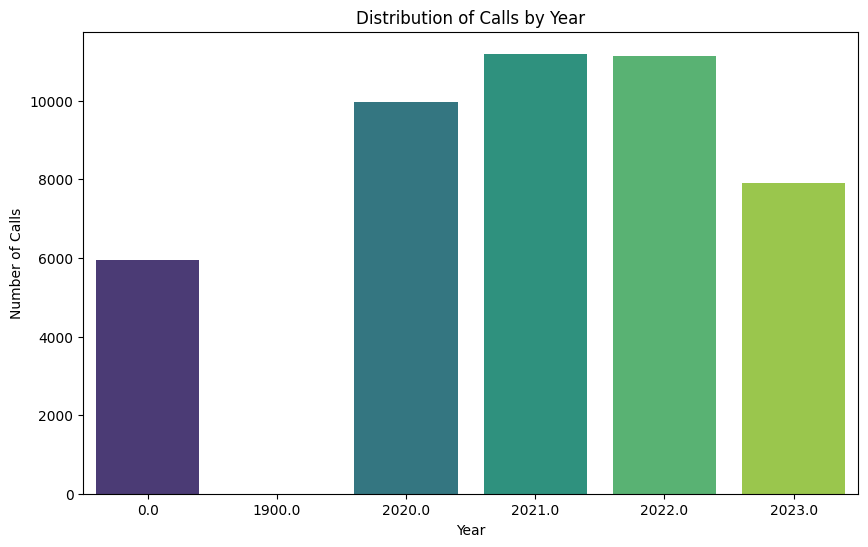

In [13]:
# Distribution of Calls by Year
plt.figure(figsize=(10, 6))
sns.countplot(x='CallYear', data=df, palette='viridis')
plt.title('Distribution of Calls by Year')
plt.xlabel('Year')
plt.ylabel('Number of Calls')
plt.show()

/tmp/ipykernel_10214/2372858134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CallMonth', data=df, palette='viridis')


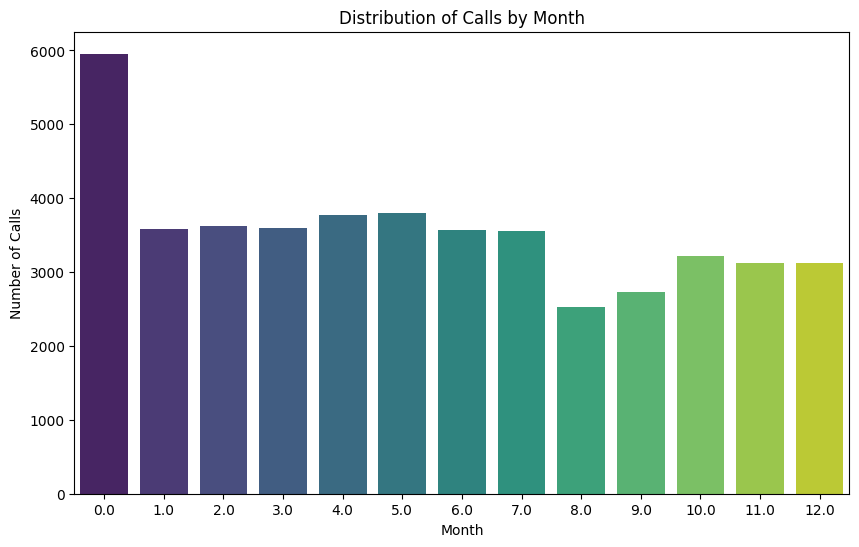

In [14]:
# Distribution of Calls by Month
plt.figure(figsize=(10, 6))
sns.countplot(x='CallMonth', data=df, palette='viridis')
plt.title('Distribution of Calls by Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.show()

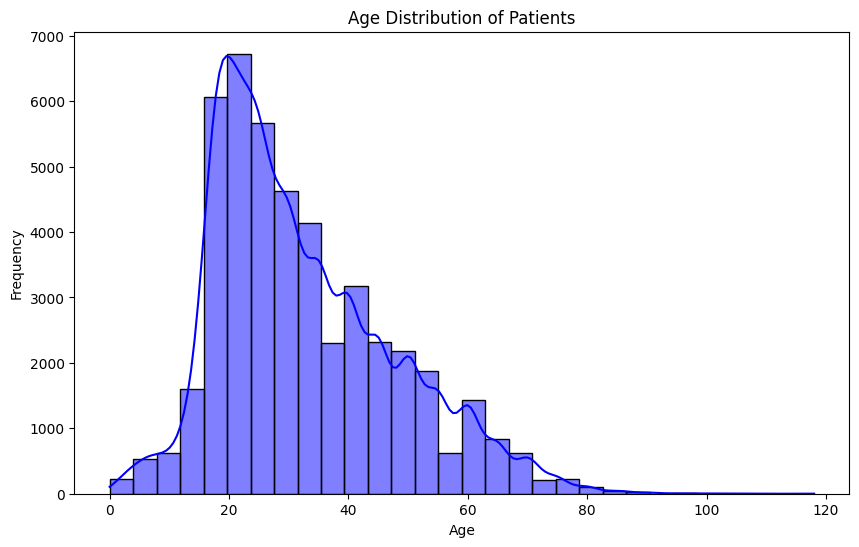

In [15]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


/tmp/ipykernel_10214/2622802763.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='InjuryType', data=df, palette='viridis', order=df['InjuryType'].value_counts().index)


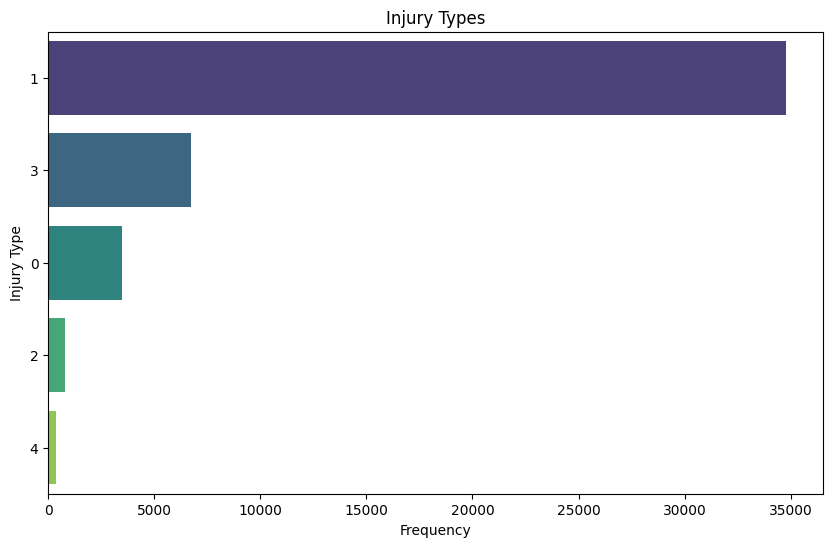

/tmp/ipykernel_10214/2622802763.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Cause', data=df, palette='viridis', order=df['Cause'].value_counts().index)


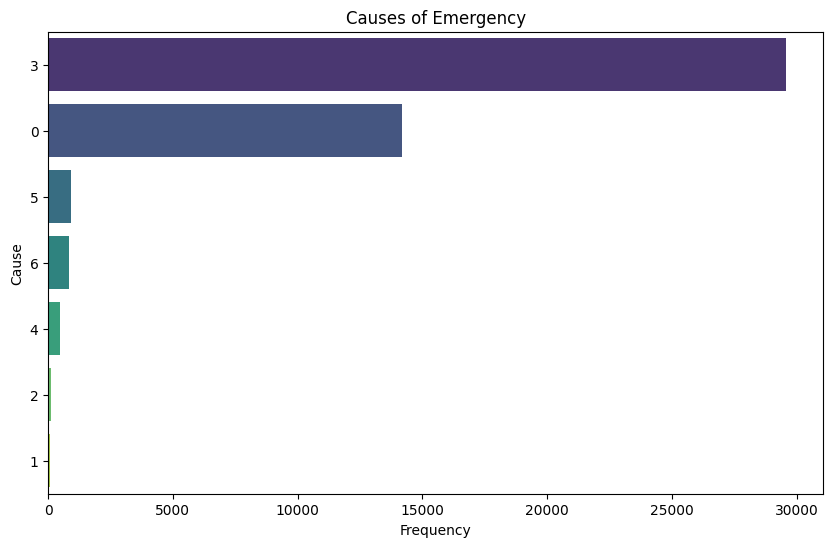

In [16]:
# Injury Types
plt.figure(figsize=(10, 6))
sns.countplot(y='InjuryType', data=df, palette='viridis', order=df['InjuryType'].value_counts().index)
plt.title('Injury Types')
plt.xlabel('Frequency')
plt.ylabel('Injury Type')
plt.show()

# Causes
plt.figure(figsize=(10, 6))
sns.countplot(y='Cause', data=df, palette='viridis', order=df['Cause'].value_counts().index)
plt.title('Causes of Emergency')
plt.xlabel('Frequency')
plt.ylabel('Cause')
plt.show()


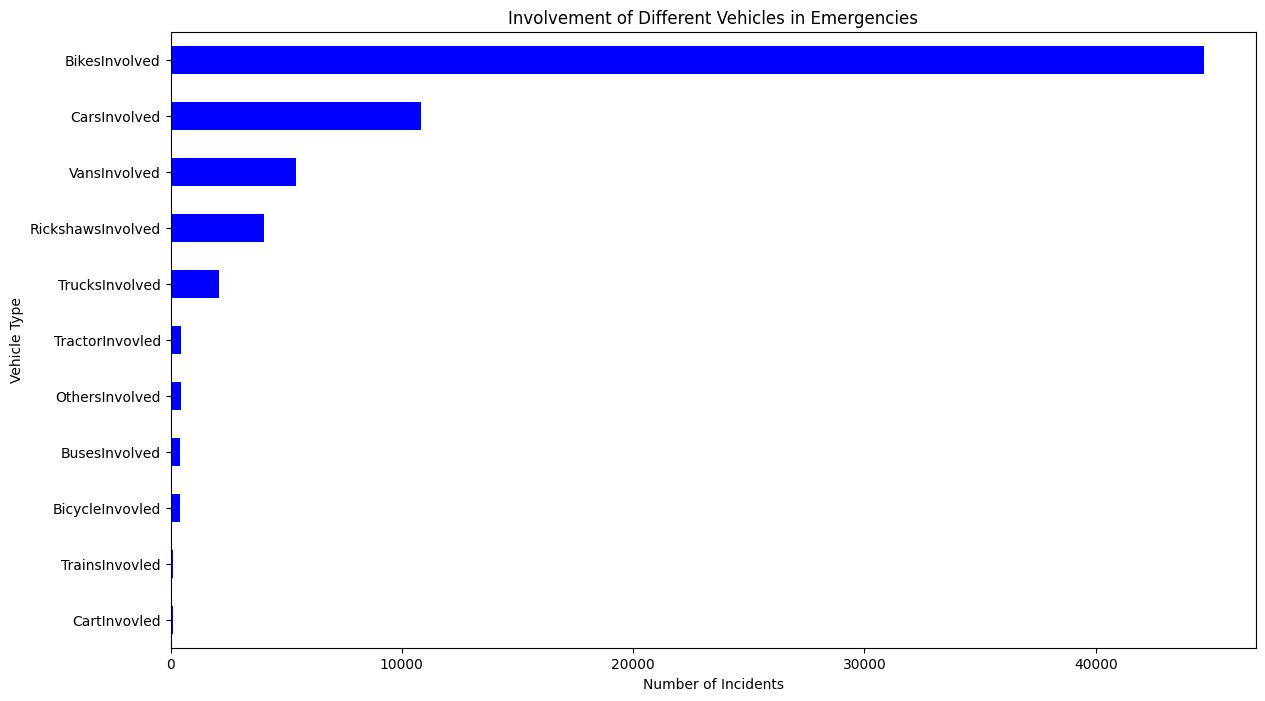

In [17]:
# Vehicles Involved
vehicles = ['BicycleInvovled', 'BikesInvolved', 'BusesInvolved', 'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 'TractorInvovled', 'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved']

plt.figure(figsize=(14, 8))
df[vehicles].sum().sort_values().plot(kind='barh', color='blue')
plt.title('Involvement of Different Vehicles in Emergencies')
plt.xlabel('Number of Incidents')
plt.ylabel('Vehicle Type')
plt.show()


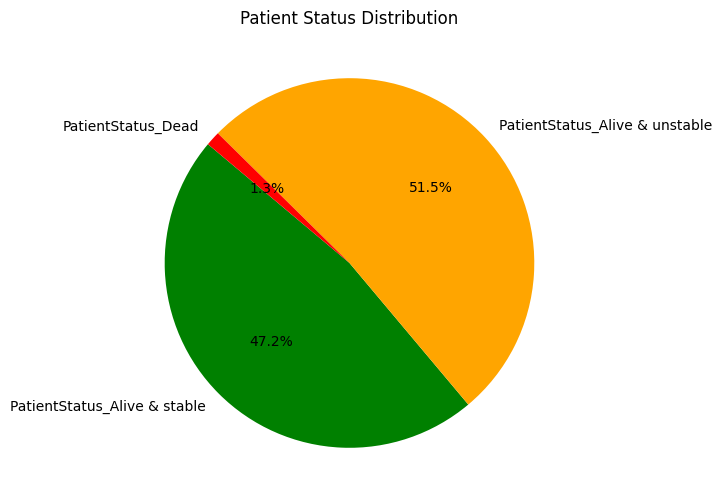

In [18]:
# Patient Status Distribution
status_cols = ['PatientStatus_Alive & stable', 'PatientStatus_Alive & unstable', 'PatientStatus_Dead']

plt.figure(figsize=(10, 6))
df[status_cols].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'orange', 'red'])
plt.title('Patient Status Distribution')
plt.ylabel('')
plt.show()


/tmp/ipykernel_10214/215369026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CallHour', data=df, palette='viridis')


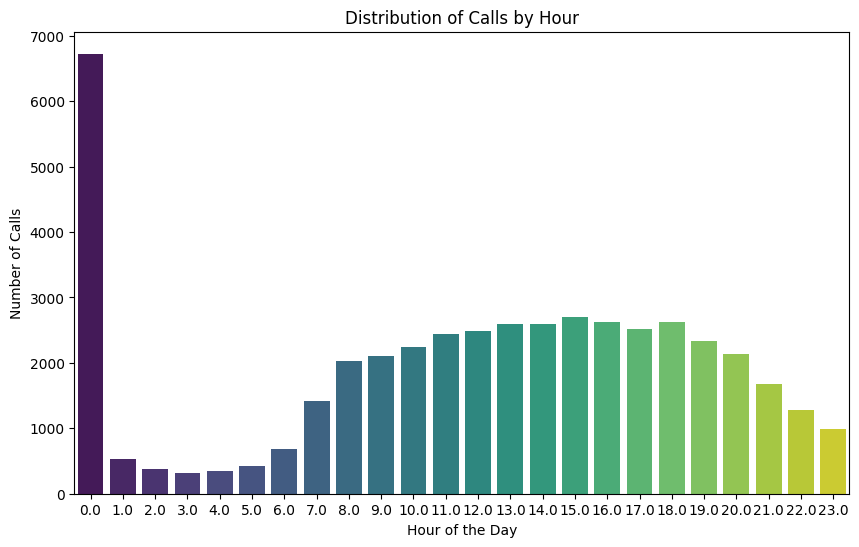

/tmp/ipykernel_10214/215369026.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CallDay', data=df, palette='viridis')


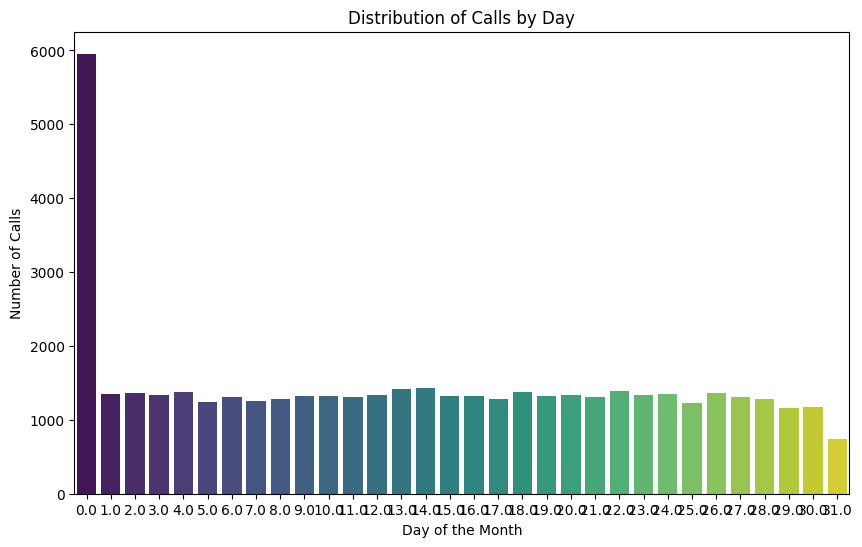

In [19]:
# Call Time by Hour
plt.figure(figsize=(10, 6))
sns.countplot(x='CallHour', data=df, palette='viridis')
plt.title('Distribution of Calls by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.show()

# Call Time by Day
plt.figure(figsize=(10, 6))
sns.countplot(x='CallDay', data=df, palette='viridis')
plt.title('Distribution of Calls by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Calls')
plt.show()


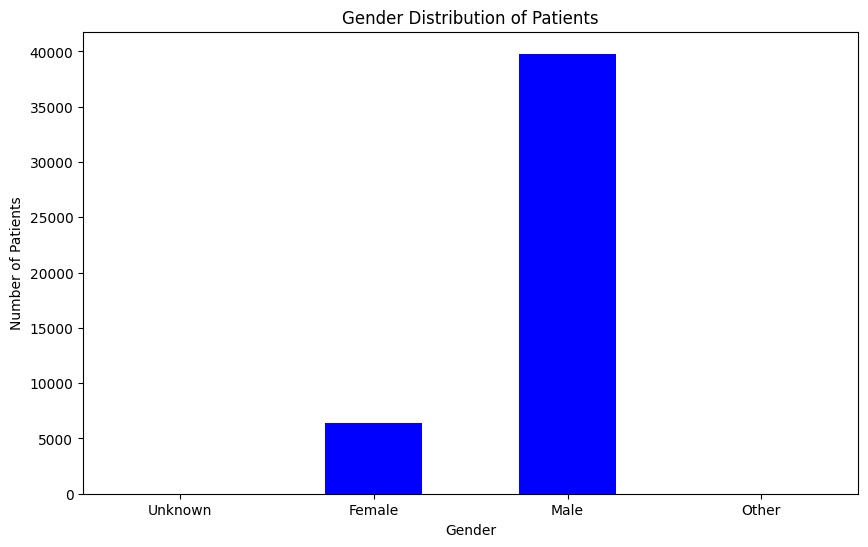

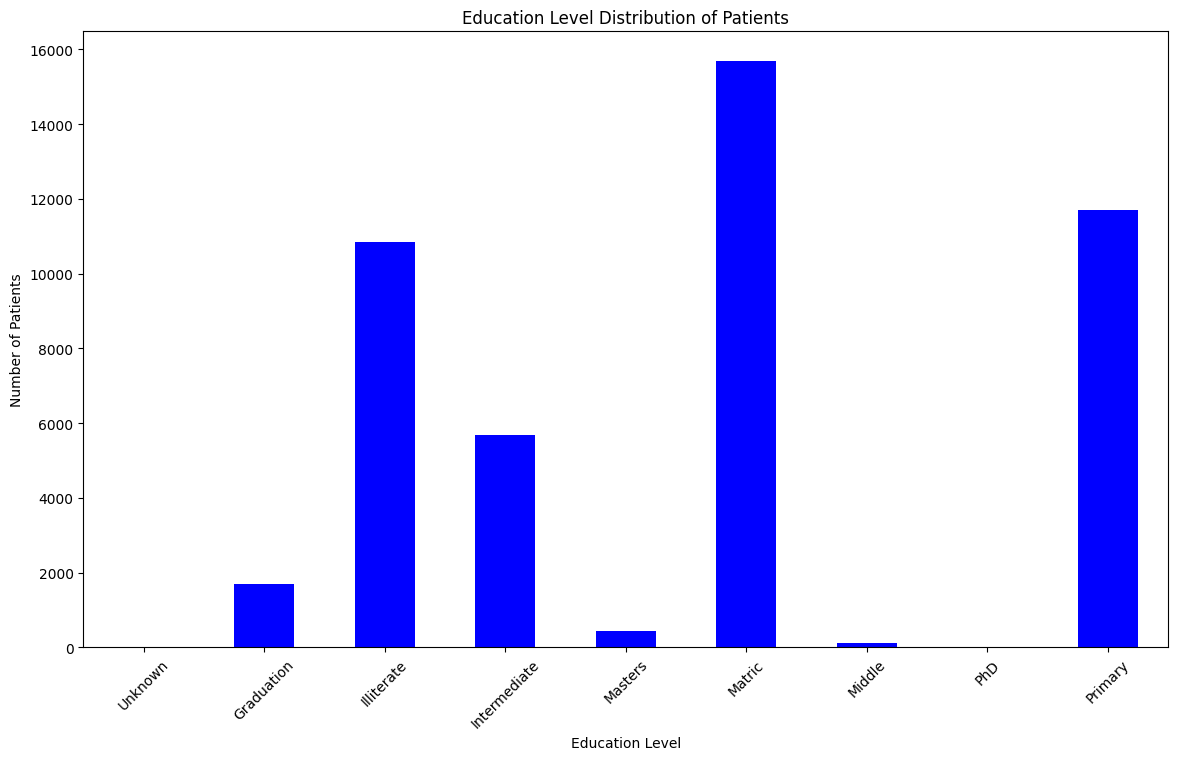

In [20]:
# Gender Distribution
gender_cols = ['Gender_0', 'Gender_Female', 'Gender_Male', 'Gender_Other']

plt.figure(figsize=(10, 6))
df[gender_cols].sum().plot(kind='bar', color='blue')
plt.title('Gender Distribution of Patients')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.xticks(ticks=range(len(gender_cols)), labels=['Unknown', 'Female', 'Male', 'Other'], rotation=0)
plt.show()

# Education Distribution
education_cols = ['EducationTitle_0', 'EducationTitle_Graduation', 'EducationTitle_Illetrate', 'EducationTitle_Intermediate', 'EducationTitle_Masters', 'EducationTitle_Matric', 'EducationTitle_Middle', 'EducationTitle_PHD', 'EducationTitle_Primary']

plt.figure(figsize=(14, 8))
df[education_cols].sum().plot(kind='bar', color='blue')
plt.title('Education Level Distribution of Patients')
plt.xlabel('Education Level')
plt.ylabel('Number of Patients')
plt.xticks(ticks=range(len(education_cols)), labels=['Unknown', 'Graduation', 'Illiterate', 'Intermediate', 'Masters', 'Matric', 'Middle', 'PhD', 'Primary'], rotation=45)
plt.show()
